In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/My Drive/Medicinal plant dataset'
!ls '/content/drive/My Drive/Medicinal plant dataset'

Mounted at /content/drive
Aloevera      Ashwagandha  Betel_Nut   Ekka	 Hibiscus  Lemon_grass	Nithyapushpa  Raktachandini
Amla	      Avacado	   Brahmi      Ganike	 Honge	   Mango	Nooni	      Rose
Amruta_Balli  Bamboo	   Castor      Gauva	 Insulin   Mint		Pappaya       Sapota
Arali	      Basale	   Curry_Leaf  Geranium  Jasmine   Nagadali	Pepper	      Tulasi
Ashoka	      Betel	   Doddapatre  Henna	 Lemon	   Neem		Pomegranate   Wood_sorel


In [ ]:
import os
import tensorflow as tf

num_skipped = 0

# Additional folder names
folder_names = ["Aloevera", "Amla", "Amruta_Balli", "Arali", "Ashoka", "Ashwagandha", "Avacado","Bamboo","Basale","Betel","Betel_Nut","Brahmi","Castor","Curry_Leaf","Doddapatre","Ekka","Ganike","Gauva","Geranium","Henna","Hibiscus","Honge","Insulin","Jasmine","Lemon","Lemon_grass","Mango","Mint","Nagadali","Neem","Nithyapushpa","Nooni","Pappaya","Pepper","Pomegranate","Raktachandini","Rose","Sapota","Tulasi","Wood_sorel"]

for folder_name in folder_names:
    folder_path = os.path.join('/content/drive/My Drive/Medicinal plant dataset', folder_name)

    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)

        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)


Deleted 0 images


In [ ]:
import tensorflow as tf

image_size = (180, 180)
batch_size = 128
data_directory = '/content/drive/My Drive/Medicinal plant dataset'

# Updated class_names dictionary
class_names = {'Aloevera': 0, 'Amla': 1, 'Amruta_Balli': 2, 'Arali': 3, 'Ashoka': 4, 'Ashwagandha': 5, 'Avacado': 6,'Bamboo':7,'Basale':8,'Betel':9,'Betel_Nut':10,'Brahmi':11,'Castor':12,'Curry_Leaf':13,'Doddapatre':14,'Ekka':15,'Ganike':16,'Gauva':17,'Geranium':18,'Henna':19,'Hibiscus':20,'Honge':21,'Insulin':22,'Jasmine':23,'Lemon':24,'Lemon_grass':25,'Mango':26,'Mint':27,'Nagadali':28,'Neem':29,'Nithyapushpa':30,'Nooni':31,'Pappaya':32,'Pepper':33,'Pomegranate':34,'Raktachandini':35,'Rose':36,'Sapota':37,'Tulasi':38,'Wood_sorel':39}

def count_images(dataset):
    counts = {class_label: 0 for class_label in class_names.values()}
    for _, labels in dataset:
        for label in labels.numpy():
            counts[label] += 1
    return counts

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    class_names=class_names,
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    class_names=class_names,
)

Found 5955 files belonging to 40 classes.
Using 4764 files for training.
Found 5955 files belonging to 40 classes.
Using 1191 files for validation.


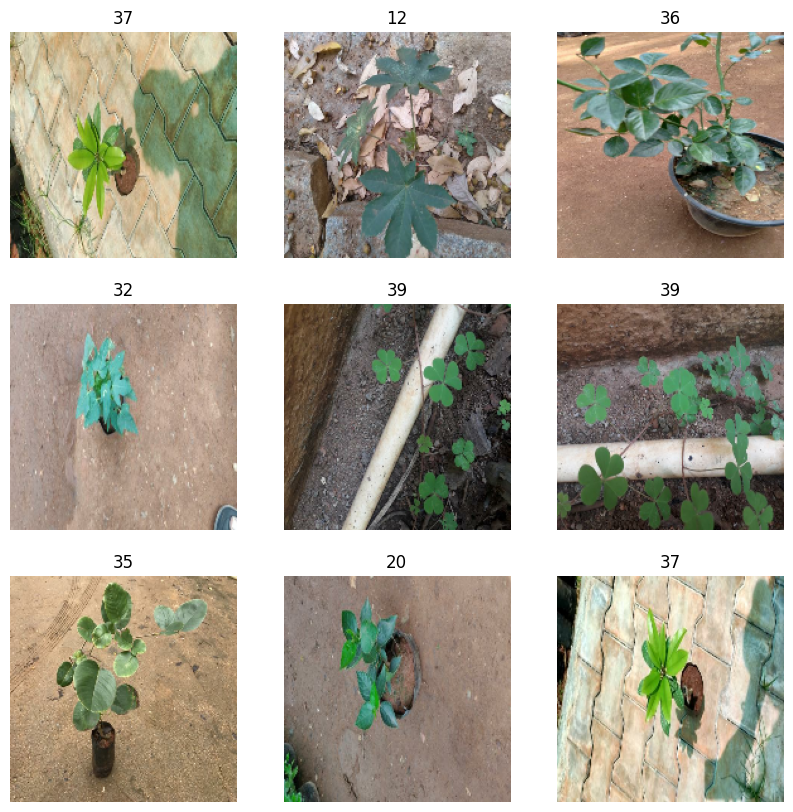

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

plt.show()

In [ ]:
IMAGE_SIZE = (224, 224)

# Define an ImageDataGenerator with augmentation and rescaling
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a synthetic image batch for demonstration
image_batch = tf.random.normal((1, IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Apply the preprocessing pipeline to the image batch
result_batch = datagen.flow(image_batch)

# Display the min and max pixel values after preprocessing
print("Min and max pixel values:", result_batch[0].min(), result_batch[0].max())


Min and max pixel values: -0.014335984 0.012482058


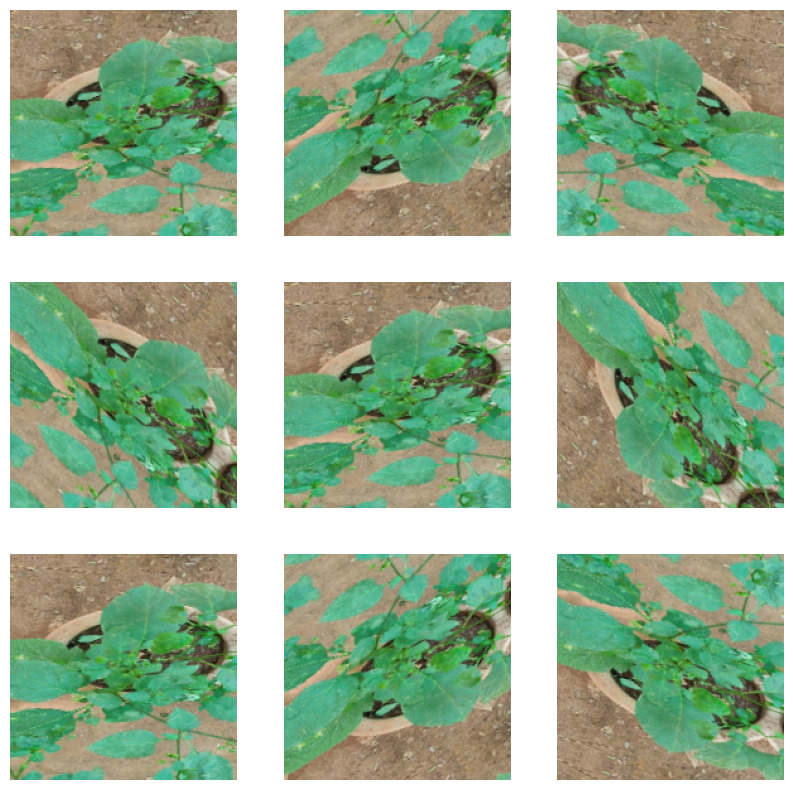

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.2),
    ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
print(len(class_names))

40


In [ ]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the fully connected layers and with the specified input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Freeze the convolutional layers of the VGG16 model
for layer in base_model.layers:
    layer.trainable = False

# Add custom fully connected layers on top of the VGG16 base
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=75
)

Epoch 1/75
38/38 [==============================] - 43s 866ms/step - loss: 3.6489 - accuracy: 0.0481 - val_loss: 3.2666 - val_accuracy: 0.1092
Epoch 2/75
38/38 [==============================] - 38s 880ms/step - loss: 3.1451 - accuracy: 0.1358 - val_loss: 2.7392 - val_accuracy: 0.2359
Epoch 3/75
38/38 [==============================] - 39s 909ms/step - loss: 2.7927 - accuracy: 0.2114 - val_loss: 2.4346 - val_accuracy: 0.3132
Epoch 4/75
38/38 [==============================] - 37s 870ms/step - loss: 2.5089 - accuracy: 0.2754 - val_loss: 2.1636 - val_accuracy: 0.3762
Epoch 5/75
38/38 [==============================] - 36s 862ms/step - loss: 2.2862 - accuracy: 0.3251 - val_loss: 1.9618 - val_accuracy: 0.4299
Epoch 6/75
38/38 [==============================] - 37s 862ms/step - loss: 2.1062 - accuracy: 0.3730 - val_loss: 1.9161 - val_accuracy: 0.4517
Epoch 7/75
38/38 [==============================] - 38s 915ms/step - loss: 1.9657 - accuracy: 0.4108 - val_loss: 1.8469 - val_accuracy: 0.4391

In [ ]:
# Output layer shape
print("Output layer shape:", model.output_shape)


Output layer shape: (None, 40)


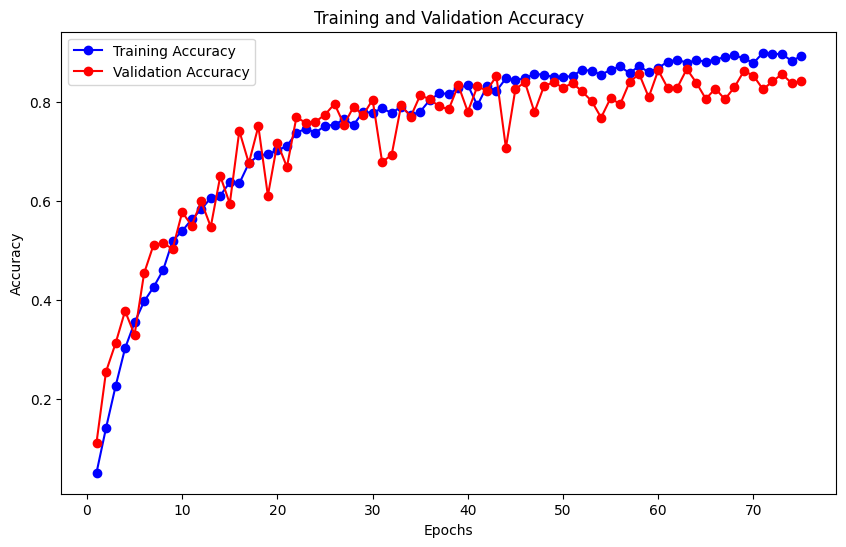

10/10 [==============================] - 4s 59ms/step - loss: 0.7163 - accuracy: 0.8421
Accuracy 0.8421494364738464


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the accuracy and validation accuracy across epochs
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


loss, accuracy = model.evaluate(val_ds)
print("Accuracy", accuracy)